In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
random_fields = np.load('/data1/jy384/research/Data/DIPDE/gaussian_field_samples.npy')
kappa_samples = np.load('/data1/jy384/research/Data/DIPDE/kappa_samples.npy')

In [4]:
# make into 2D array
random_fields = random_fields.reshape(random_fields.shape[0], 32, 32)
kappa_samples = kappa_samples.reshape(kappa_samples.shape[0], 32, 32)

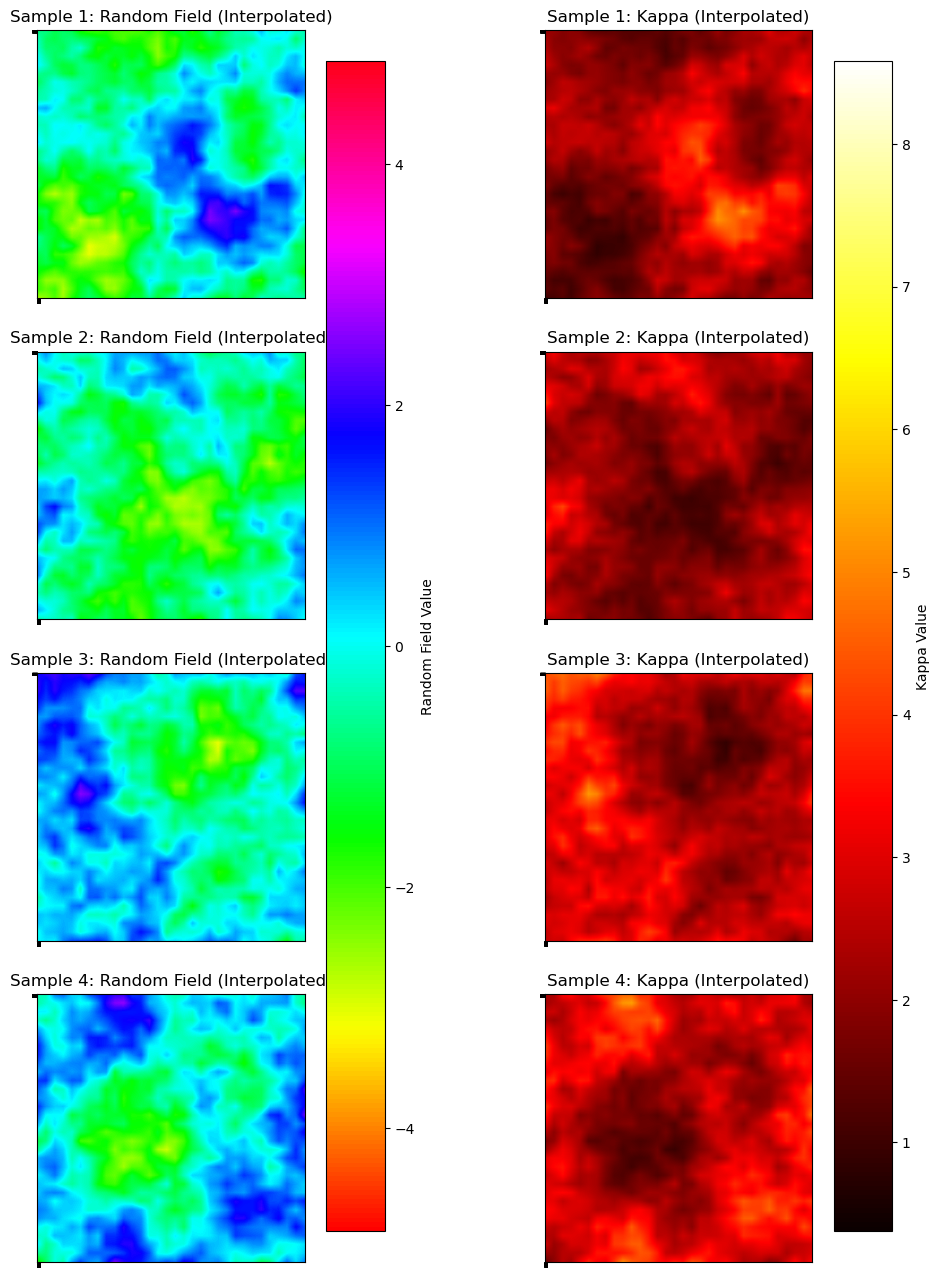

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Define the scale factor for the interpolation (from 32 to 256 => scale factor of 8)
scale_factor = 256 / 32  # equals 8

# Interpolate each 32x32 field to 256x256 using linear interpolation (order=1)
interpolated_random_fields = np.array([zoom(field, scale_factor, order=1) for field in random_fields])
interpolated_kappa_samples = np.array([zoom(field, scale_factor, order=1) for field in kappa_samples])

# Determine a common color scale based on both interpolated fields
rf_min = interpolated_random_fields.min()
rf_max = interpolated_random_fields.max()
kappa_min = interpolated_kappa_samples.min()
kappa_max = interpolated_kappa_samples.max()

# Create a figure with 4 rows and 2 columns to plot corresponding samples side by side
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
for i in range(4):
    # Plot the interpolated random field using 'hsv' colormap (Gaussian field)
    im_rf = axs[i, 0].imshow(interpolated_random_fields[i], cmap='hsv', vmin=rf_min, vmax=rf_max)
    axs[i, 0].set_title(f'Sample {i+1}: Random Field (Interpolated)')
    # 0 to 1 x and y axis
    x_coords = np.linspace(0, 1, interpolated_random_fields.shape[2])
    y_coords = np.linspace(0, 1, interpolated_random_fields.shape[1])
    axs[i, 0].set_xticks(x_coords)
    axs[i, 0].set_yticks(y_coords)
    axs[i, 0].set_xticklabels([])
    axs[i, 0].set_yticklabels([])
    
    
    # axs[i, 0].axis('off')
    
    # Plot the corresponding interpolated kappa sample using 'hot' colormap
    im_kappa = axs[i, 1].imshow(interpolated_kappa_samples[i], cmap='hot', vmin=kappa_min, vmax=kappa_max)
    axs[i, 1].set_title(f'Sample {i+1}: Kappa (Interpolated)')
    # 0 to 1 x and y axis
    x_coords = np.linspace(0, 1, interpolated_kappa_samples.shape[2])
    y_coords = np.linspace(0, 1, interpolated_kappa_samples.shape[1])
    axs[i, 1].set_xticks(x_coords)
    axs[i, 1].set_yticks(y_coords)
    axs[i, 1].set_xticklabels([])
    axs[i, 1].set_yticklabels([])

# Add a separate colorbar for the Gaussian random fields (left column)
cbar_rf = fig.colorbar(im_rf, ax=axs[:, 0], shrink=0.95)
cbar_rf.set_label('Random Field Value')

# Add a separate colorbar for the Kappa fields (right column)
cbar_kappa = fig.colorbar(im_kappa, ax=axs[:, 1], shrink=0.95)
cbar_kappa.set_label('Kappa Value')

plt.show()

In [ ]:
# import fenicsx
import fenicsx
from fenicsx import mesh, fem, io
import numpy as np
import matplotlib.pyplot as plt

